# AdaBoost

scikit-learn中Adaboost类库比较直接，就是 AdaBoostClassifier和AdaBoostRegressor两个，从名字就可以看出AdaBoostClassifier用于分类，AdaBoostRegressor用于回归。

AdaBoostClassifier使用了两种Adaboost分类算法的实现，SAMME(二分类)和SAMME.R(二分类)。

AdaBoostRegressor则使用了我们原理篇里讲到的Adaboost回归算法的实现，即Adaboost.R2。

当我们对Adaboost调参时，主要要对两部分内容进行调参，
    
    第一部分是对我们的Adaboost的框架进行调参， 
    
    第二部分是对我们选择的弱分类器进行调参。两者相辅相成。
 
下面就对Adaboost的两个类：AdaBoostClassifier和AdaBoostRegressor从这两部分做一个介绍。

### 框架参数

- base_estimator：即我们的弱分类学习器或者弱回归学习器，我们常用的一般是CART决策树或者神经网络MLP。默认是决策树，即AdaBoostClassifier默认使用CART分类树DecisionTreeClassifier，而AdaBoostRegressor默认使用CART回归树DecisionTreeRegressor。


- algorithm：这个参数只有AdaBoostClassifier有。主要原因是scikit-learn实现了两种Adaboost分类算法，SAMME和SAMME.R。两者的主要区别是弱学习器权重的度量，SAMME使用了和我们的原理篇里二元分类Adaboost算法的扩展，即用对样本集分类效果作为弱学习器权重，而SAMME.R使用了对样本集分类的预测概率大小来作为弱学习器权重。由于SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifier的默认算法algorithm的值也是SAMME.R。我们一般使用默认的SAMME.R就够了，但是要注意的是使用了SAMME.R， 则弱分类学习器参数base_estimator必须限制使用支持概率预测的分类器。SAMME算法则没有这个限制。


- loss：这个参数只有AdaBoostRegressor有，Adaboost.R2算法需要用到。有线性‘linear’, 平方‘square’和指数 ‘exponential’三种选择, 默认是线性，一般使用线性就足够了，除非你怀疑这个参数导致拟合程度不好。这就是原理中对于单个样本误差的计算。


- n_estimators：弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是50。


- learning_rate： AdaBoostClassifier和AdaBoostRegressor都有，即每个弱学习器的权重缩减系数ν，在原理篇的正则化章节我们也讲到了，加上了正则化项。对于同样的训练集拟合效果，较小的ν意味着我们需要更多的弱学习器的迭代次数。通常我们用步长和迭代最大次数一起来决定算法的拟合效果。所以这两个参数n_estimators和learning_rate要一起调参。默认是1

### 若学习器参数

-  划分时考虑的最大特征数max_features: 一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。


- 决策树最大深max_depth: 默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。


- 内部节点再划分所需最小样本数min_samples_split: 这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2. 再划分子树的时候 看样本数是否进行划分。


- 叶子节点最少样本数min_samples_leaf: 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。


-  叶子节点最小的样本权重和min_weight_fraction_leaf：这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。


-  最大叶子节点数max_leaf_nodes: 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。

### 实例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2

In [2]:
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, 
                                n_features=2,n_classes=2, random_state=1)

生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2

In [7]:
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, 
                                 n_features=2, n_classes=2, random_state=1)

In [8]:
#讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

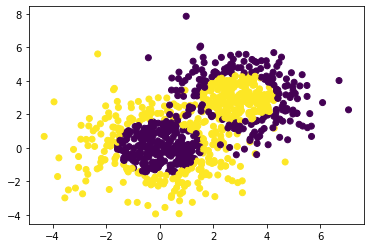

In [12]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

In [14]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
            min_samples_split=20,min_samples_leaf=5),
            algorithm='SAMME',n_estimators=200,learning_rate=0.8)

bdt.fit(X,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=20,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                           

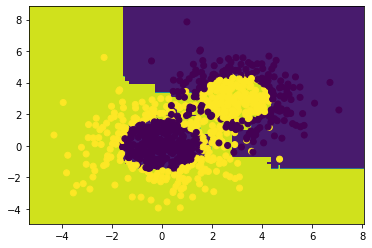

In [18]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y )
plt.show()

In [19]:
bdt.score(X,y)

0.9133333333333333

对弱分类器进行调参 

max_depth  

max_depth  

algorithm 二分类

n_estimators  若学习器个数

In [31]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)

print("Score:",bdt.score(X,y))

Score: 0.9622222222222222


In [32]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)

print("Score:",bdt.score(X,y))

Score: 1.0


In [33]:
# 修改学习率 v
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:",bdt.score(X,y))

Score: 0.8944444444444445


In [35]:
# n_estimators 加大若学习器数
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=600, learning_rate=0.7)
bdt.fit(X, y)

print("Score:",bdt.score(X,y))

Score: 0.9611111111111111
